# DCS680
# Climate Dataset Exploration
## Justin Pizzoferrato
## 6.8.25

In [197]:
import pandas as pd

# Load NOAA climate event summary
noaa_path = "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/21.21/data/0-data/events-US-1980-2024-Q4.csv"
noaa_df = pd.read_csv(noaa_path)

# Load FEMA declaration data
fema_path = "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/DisasterDeclarationsSummaries (1).csv"
fema_df = pd.read_csv(fema_path)

# Preview both datasets
print("NOAA dataset shape:", noaa_df.shape)
print("FEMA dataset shape:", fema_df.shape)

noaa_df.head(3), fema_df.head(3)

NOAA dataset shape: (405, 7)
FEMA dataset shape: (68178, 28)


(  Weather and Climate Billion-Dollar Disasters to affect the U.S. from 1980-2024  \
 0             Cost values are in millions of dollars                               
 1                                               Name                               
 2   Southern Severe Storms and Flooding (April 1980)                               
 
   Unnamed: 1  Unnamed: 2 Unnamed: 3         Unnamed: 4       Unnamed: 5  \
 0        NaN         NaN        NaN                NaN              NaN   
 1   Disaster  Begin Date   End Date  CPI-Adjusted Cost  Unadjusted Cost   
 2   Flooding    19800410   19800417             2749.4            706.8   
 
   Unnamed: 6  
 0        NaN  
 1     Deaths  
 2          7  ,
   femaDeclarationString  disasterNumber state declarationType  \
 0            FM-5529-OR            5529    OR              FM   
 1            FM-5528-OR            5528    OR              FM   
 2            FM-5527-OR            5527    OR              FM   
 
             declarat

In [199]:
# Select and rename FEMA columns
fema_clean = fema_df[[
    'disasterNumber', 'state', 'declarationType', 'declarationDate',
    'fyDeclared', 'incidentType', 'declarationTitle'
]].copy()

# Convert dates to datetime
fema_clean['declarationDate'] = pd.to_datetime(fema_clean['declarationDate'], errors='coerce')

# Add month or year field for seasonal/time trends
fema_clean['year'] = fema_clean['declarationDate'].dt.year
fema_clean['month'] = fema_clean['declarationDate'].dt.month

# Add region mapping for storytelling visuals
region_map = {
    'Northeast': ['NY', 'NJ', 'PA', 'MA', 'CT', 'RI', 'NH', 'VT', 'ME'],
    'Midwest': ['IL', 'IN', 'OH', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'South': ['TX', 'FL', 'GA', 'NC', 'SC', 'AL', 'MS', 'LA', 'AR', 'OK', 'KY', 'TN', 'WV', 'VA', 'DC', 'DE', 'MD'],
    'West': ['CA', 'OR', 'WA', 'AK', 'HI', 'CO', 'UT', 'NV', 'AZ', 'NM', 'MT', 'WY', 'ID']
}
fema_clean['region'] = fema_clean['state'].map(
    {state: region for region, states in region_map.items() for state in states}
)

# Preview result
fema_clean.head()

disasterNumber state declarationType           declarationDate  fyDeclared  \
0            5529    OR              FM 2024-08-09 00:00:00+00:00        2024   
1            5528    OR              FM 2024-08-06 00:00:00+00:00        2024   
2            5527    OR              FM 2024-08-02 00:00:00+00:00        2024   
3            4312    CA              DR 2017-05-02 00:00:00+00:00        2017   
4            4251    AL              DR 2016-01-21 00:00:00+00:00        2016   

   incidentType                                   declarationTitle  year  \
0          Fire                                     LEE FALLS FIRE  2024   
1          Fire                                      ELK LANE FIRE  2024   
2          Fire                               MILE MARKER 132 FIRE  2024   
3  Severe Storm                                           FLOODING  2017   
4  Severe Storm  SEVERE STORMS, TORNADOES, STRAIGHT-LINE WINDS,...  2016   

   month region  
0      8   West  
1      8   West  
2      8   West  
3      5   West  
4      1  South

In [201]:
# Step 1: Reload NOAA with correct header (skip the first metadata row)
noaa_df = pd.read_csv(noaa_path, skiprows=1)

# Step 2: Rename columns for clarity
noaa_df.columns = ['Event', 'Disaster Type', 'Begin Date', 'End Date',
                   'CPI-Adjusted Cost', 'Unadjusted Cost', 'Deaths']

# Step 3: Convert dates to datetime
noaa_df['Begin Date'] = pd.to_datetime(noaa_df['Begin Date'].astype(str).str.strip(), format='%Y%m%d', errors='coerce')
noaa_df['End Date'] = pd.to_datetime(noaa_df['End Date'].astype(str).str.strip(), format='%Y%m%d', errors='coerce')

# Step 4: Create year column and duration
noaa_df['Year'] = noaa_df['Begin Date'].dt.year
noaa_df['eventDuration'] = (noaa_df['End Date'] - noaa_df['Begin Date']).dt.days

# Step 5: Convert cost to numeric
noaa_df['CPI-Adjusted Cost'] = pd.to_numeric(noaa_df['CPI-Adjusted Cost'], errors='coerce')

# Preview result
noaa_df.head()

Event     Disaster Type  \
0                                               Name          Disaster   
1   Southern Severe Storms and Flooding (April 1980)          Flooding   
2                      Hurricane Allen (August 1980)  Tropical Cyclone   
3  Central/Eastern Drought/Heat Wave (Summer-Fall...           Drought   
4                      Florida Freeze (January 1981)            Freeze   

  Begin Date   End Date  CPI-Adjusted Cost  Unadjusted Cost  Deaths    Year  \
0        NaT        NaT                NaN  Unadjusted Cost  Deaths     NaN   
1 1980-04-10 1980-04-17             2749.4            706.8       7  1980.0   
2 1980-08-07 1980-08-11             2236.2              590      13  1980.0   
3 1980-06-01 1980-11-30            40681.2            10020    1260  1980.0   
4 1981-01-12 1981-01-14             2076.4              572       0  1981.0   

   eventDuration  
0            NaN  
1            7.0  
2            4.0  
3          182.0  
4            2.0

In [207]:
# Define target folder path
save_path = "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/"

# Save FEMA cleaned dataset
fema_clean.to_csv(save_path + "FEMA_Cleaned_Climate_Disaster_Data.csv", index=False)

# Save NOAA cleaned dataset
noaa_df.to_csv(save_path + "NOAA_Cleaned_BillionDollarDisasters.csv", index=False)

# Save README files
with open(save_path + "FEMA_Cleaned_README.txt", "w") as f:
    f.write("FEMA_Cleaned_Climate_Disaster_Data.csv\n\n")
    f.write("Includes:\n- disasterNumber\n- state\n- declarationType\n")
    f.write("- declarationDate\n- fyDeclared\n- incidentType\n")
    f.write("- declarationTitle\n- year\n- month\n- region\n")

with open(save_path + "NOAA_Cleaned_README.txt", "w") as f:
    f.write("NOAA_Cleaned_BillionDollarDisasters.csv\n\n")
    f.write("Includes:\n- Event\n- Disaster Type\n- Begin/End Date\n")
    f.write("- CPI-Adjusted Cost\n- Unadjusted Cost\n- Deaths\n")
    f.write("- Year\n- eventDuration\n")

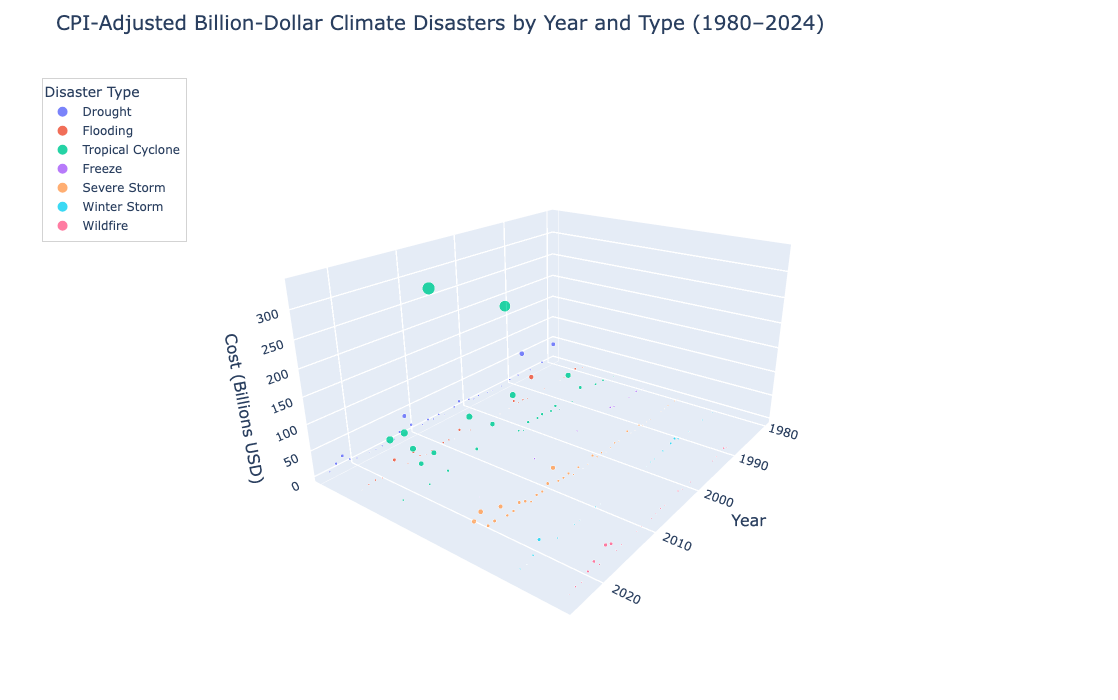

In [223]:
import plotly.express as px

# Regroup + prep 
noaa_grouped = noaa_df.groupby(['Year', 'Disaster Type'])['CPI-Adjusted Cost'].sum().reset_index()
noaa_grouped['Cost (Billions)'] = noaa_grouped['CPI-Adjusted Cost'] / 1000

# Generate scatter plot
fig = px.scatter_3d(
    noaa_grouped,
    x='Year',
    y='Disaster Type',
    z='Cost (Billions)',
    color='Disaster Type',
    size='Cost (Billions)',
    size_max=20,
    opacity=0.85,
    hover_data=None,  # ✅ Turn off label clutter
    title='CPI-Adjusted Billion-Dollar Climate Disasters by Year and Type (1980–2024)',
)

# Apply enhanced camera angle and spacing
fig.update_layout(
    width=1000,
    height=700,
    scene=dict(
        xaxis=dict(
            title='Year',
            titlefont=dict(size=16),
            tickfont=dict(size=12),
            gridcolor='rgba(180,180,180,0.3)'
        ),
        yaxis=dict(
            title='',  
            tickvals=[],  
            ticktext=[],
            showticklabels=False,
            gridcolor='rgba(180,180,180,0.3)'
        ),
        zaxis=dict(
            title='Cost (Billions USD)',
            titlefont=dict(size=16),
            tickfont=dict(size=12),
            gridcolor='rgba(180,180,180,0.3)'
        ),
        camera=dict(eye=dict(x=2.2, y=1.4, z=1.0)),
        aspectmode='manual',
        aspectratio=dict(x=1.5, y=1.2, z=0.8)
    ),
    legend=dict(
        font=dict(size=12),
        x=0.02,
        y=0.97,
        bgcolor='rgba(255,255,255,0.95)',
        bordercolor='lightgray',
        borderwidth=1
    ),
    title_font=dict(size=20),
    margin=dict(l=20, r=20, t=60, b=40)
)
fig.show()

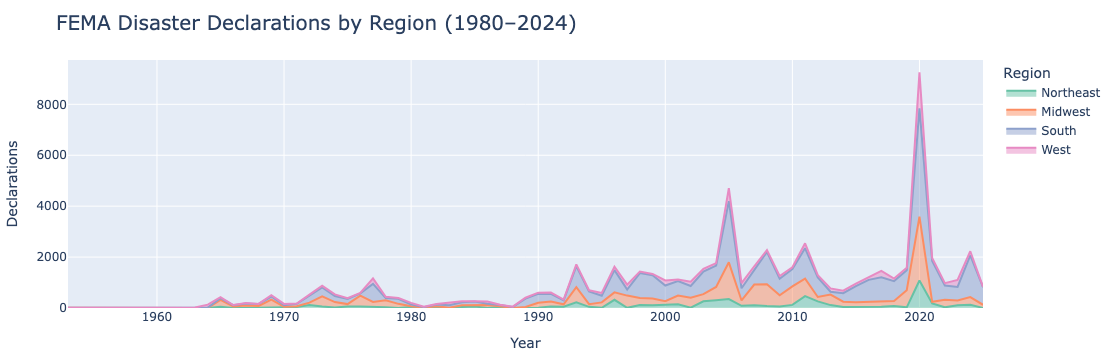

In [225]:
# Group FEMA declarations by year and region
region_counts = fema_clean.groupby(['year', 'region']).size().reset_index(name='Declarations')

# Plot: Area chart to show relative volume and contribution by region
fig = px.area(
    region_counts,
    x='year',
    y='Declarations',
    color='region',
    title='FEMA Disaster Declarations by Region (1980–2024)',
    labels={'year': 'Year', 'Declarations': 'Number of Declarations'},
    category_orders={'region': ['Northeast', 'Midwest', 'South', 'West']},
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Style for clarity and export
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Declarations',
    legend_title='Region',
    margin=dict(l=40, r=20, t=60, b=40),
    hovermode='x unified'
)

fig.show()

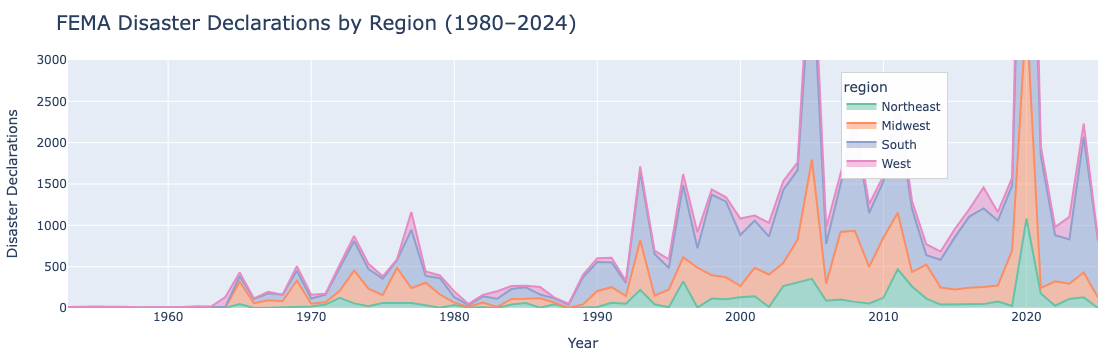

In [227]:
fig = px.area(
    region_counts,
    x='year',
    y='Declarations',
    color='region',
    title='FEMA Disaster Declarations by Region (1980–2024)',
    labels={'year': 'Year', 'Declarations': 'Number of Declarations'},
    category_orders={'region': ['Northeast', 'Midwest', 'South', 'West']},
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Disaster Declarations',
    yaxis=dict(range=[0, 3000]),  # ✅ Clip to manageable scale
    legend=dict(
        font=dict(size=12),
        x=0.75,
        y=0.95,
        bgcolor='rgba(255,255,255,0.95)',
        bordercolor='lightgray',
        borderwidth=1
    ),
    margin=dict(l=20, r=20, t=60, b=40),
    hovermode='x unified'
)

fig.show()

In [233]:
fema_clean['incidentType'].dropna().unique()

array(['Fire', 'Severe Storm', 'Straight-Line Winds', 'Flood',
       'Hurricane', 'Biological', 'Winter Storm', 'Tornado',
       'Tropical Storm', 'Earthquake', 'Typhoon', 'Snowstorm', 'Freezing',
       'Mud/Landslide', 'Coastal Storm', 'Other', 'Severe Ice Storm',
       'Dam/Levee Break', 'Volcanic Eruption', 'Toxic Substances',
       'Chemical', 'Terrorist', 'Drought', 'Human Cause',
       'Fishing Losses', 'Tsunami'], dtype=object)

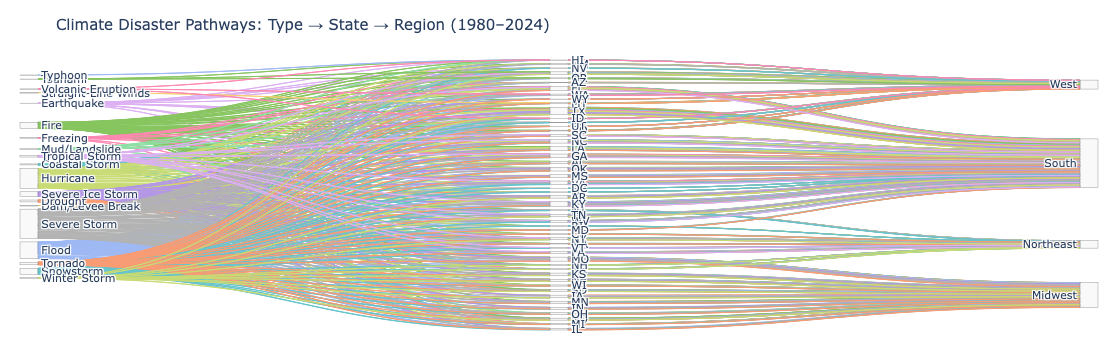

In [235]:
import plotly.graph_objects as go
# Create Sankey

# Define climate-related incident types
climate_types = [
    'Fire', 'Severe Storm', 'Straight-Line Winds', 'Flood',
       'Hurricane', 'Winter Storm', 'Tornado',
       'Tropical Storm', 'Earthquake', 'Typhoon', 'Snowstorm', 'Freezing',
       'Mud/Landslide', 'Coastal Storm', 'Severe Ice Storm',
       'Dam/Levee Break', 'Volcanic Eruption', 'Drought',
       'Tsunami'
]

# Filter FEMA data
filtered_df = fema_clean[fema_clean['incidentType'].isin(climate_types)].copy()

# Group for Sankey
sankey_df = filtered_df.groupby(['incidentType', 'state', 'region']).size().reset_index(name='count')

# Generate label list and lookup
all_labels = pd.unique(
    sankey_df['incidentType'].tolist() +
    sankey_df['state'].tolist() +
    sankey_df['region'].tolist()
).tolist()
label_lookup = {label: i for i, label in enumerate(all_labels)}

# Map flows
source1 = sankey_df['incidentType'].map(label_lookup)
target1 = sankey_df['state'].map(label_lookup)
source2 = sankey_df['state'].map(label_lookup)
target2 = sankey_df['region'].map(label_lookup)

# Color by incident type
palette = px.colors.qualitative.Pastel
type_colors = {val: palette[i % len(palette)] for i, val in enumerate(sankey_df['incidentType'].unique())}
flow_colors = sankey_df['incidentType'].map(type_colors)
sankey_colors = list(flow_colors) + list(flow_colors)

# Build Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=18,
        line=dict(color="gray", width=0.4),
        label=all_labels,
        color="rgba(200,200,200,0.1)"
    ),
    link=dict(
        source=list(source1) + list(source2),
        target=list(target1) + list(target2),
        value=sankey_df['count'].tolist() * 2,
        color=sankey_colors
    )
)])

fig.update_layout(
    title_text="Climate Disaster Pathways: Type → State → Region (1980–2024)",
    font_size=11,
    margin=dict(t=60, b=30, l=20, r=20)
)

fig.show()

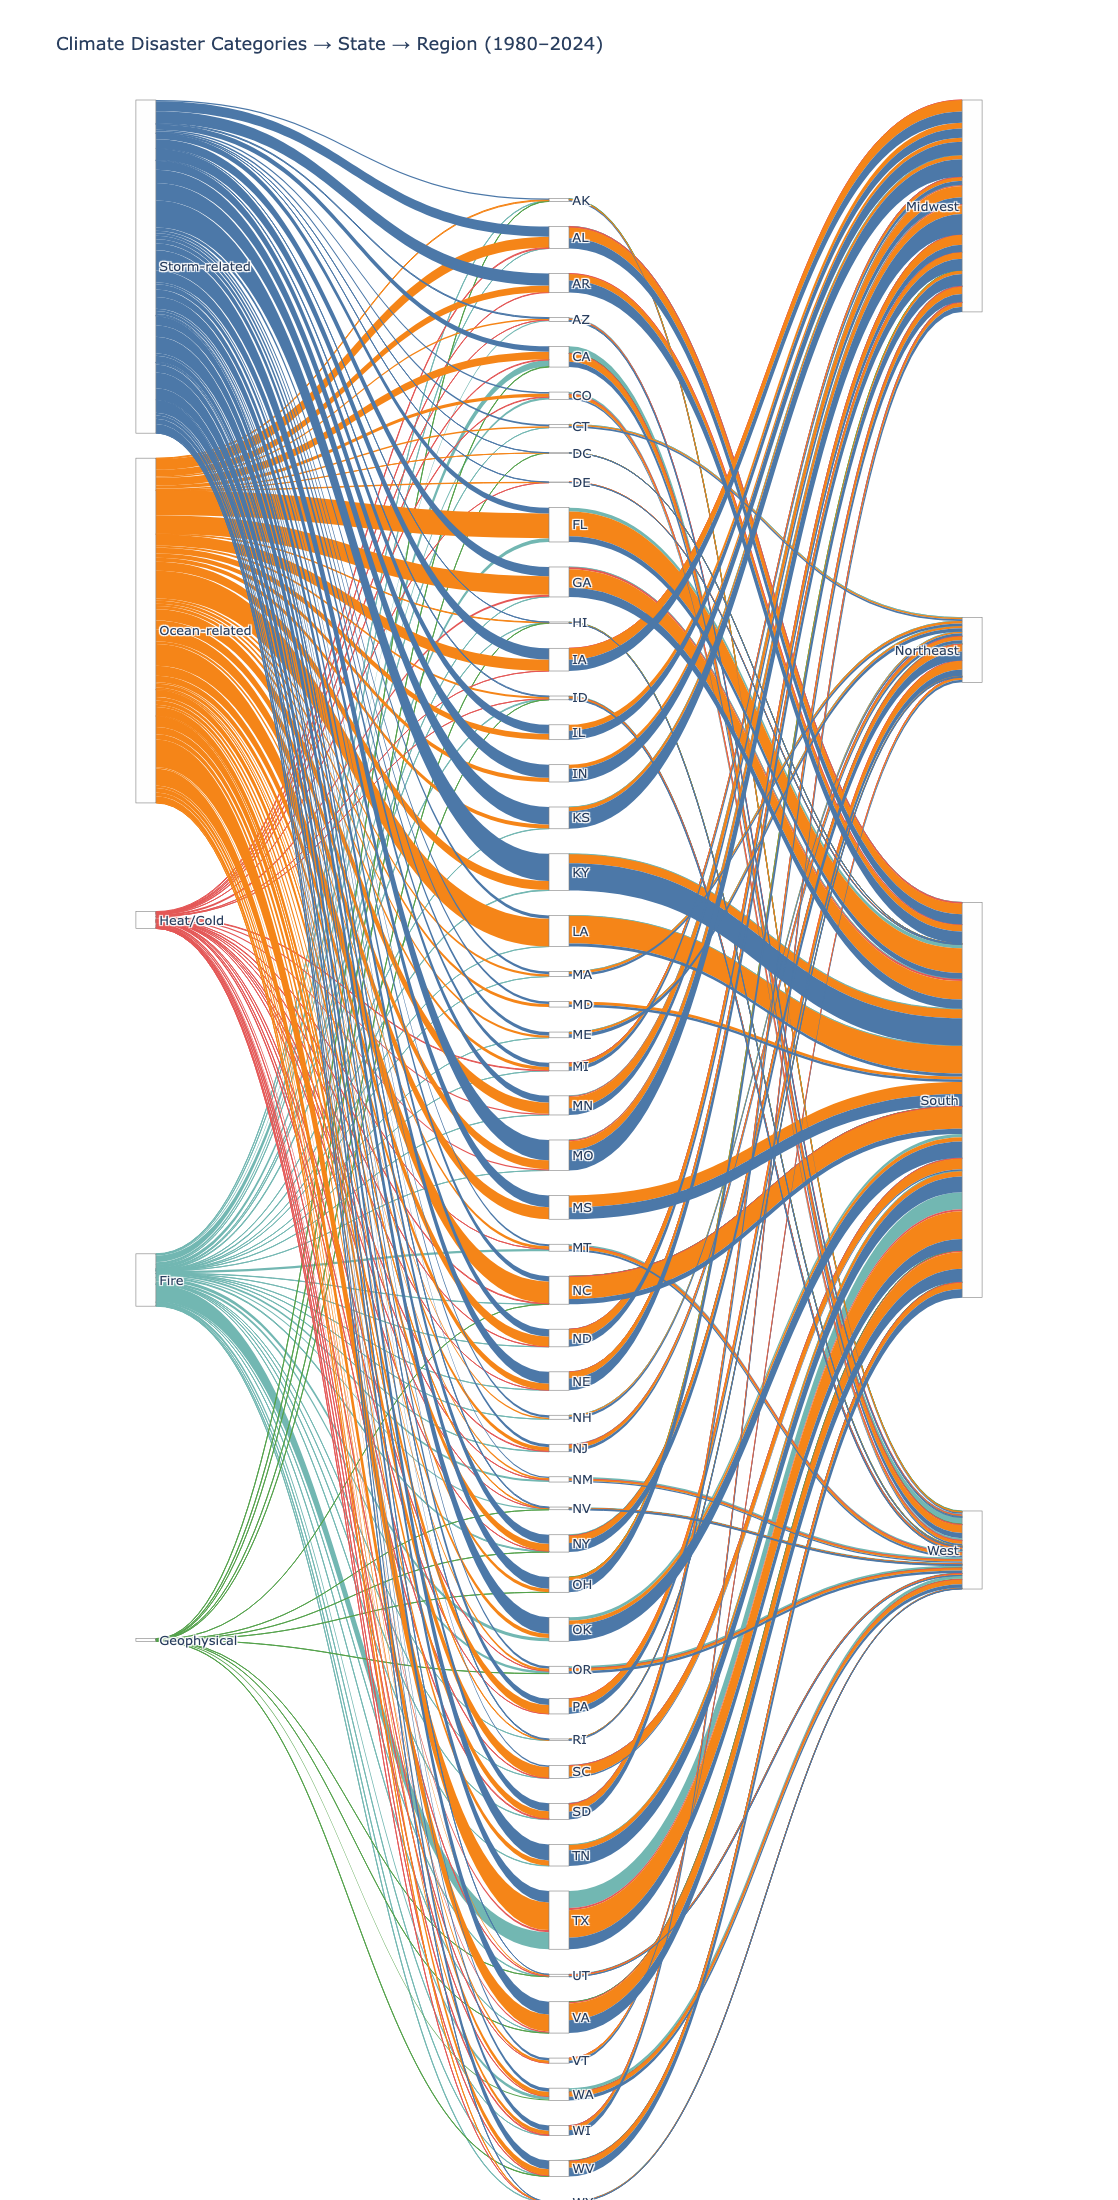

In [279]:
# Define climate disaster categories
grouped_types = {
    'Storm-related': ['Severe Storm', 'Winter Storm', 'Snowstorm', 'Tornado'],
    'Ocean-related': ['Hurricane', 'Tropical Storm', 'Flood', 'Coastal Storm', 'Tsunami'],
    'Heat/Cold': ['Freeze', 'Heat', 'Drought'],
    'Fire': ['Fire'],
    'Geophysical': ['Earthquake', 'Volcanic Eruption', 'Mud/Landslide']
}

# Map each incident to a category
def map_disaster_group(incident):
    for group, members in grouped_types.items():
        if incident in members:
            return group
    return None

# Filter and label FEMA data
filtered_df = fema_clean.copy()
filtered_df['Incident Group'] = filtered_df['incidentType'].apply(map_disaster_group)
filtered_df = filtered_df.dropna(subset=['Incident Group'])

# Create summary of flows from group → state → region
sankey_df = filtered_df.groupby(['Incident Group', 'state', 'region']).size().reset_index(name='count')

# Set clean label order for clarity
types_sorted = list(grouped_types.keys())
states_sorted = sorted(list(set(sankey_df['state'].unique())))
regions_sorted = ['Midwest', 'Northeast', 'South', 'West']

# Build the label list and mapping
all_labels = types_sorted + states_sorted + regions_sorted
label_lookup = {label: i for i, label in enumerate(all_labels)}

# Map source and target indices
source1 = sankey_df['Incident Group'].map(label_lookup)
target1 = sankey_df['state'].map(label_lookup)
source2 = sankey_df['state'].map(label_lookup)
target2 = sankey_df['region'].map(label_lookup)

# Color each group for flow tracking
custom_colors = ['#4C78A8', '#F58518', '#E45756', '#72B7B2', '#54A24B']
group_color_map = {grp: custom_colors[i] for i, grp in enumerate(types_sorted)}
flow_colors = sankey_df['Incident Group'].map(group_color_map)
sankey_colors = list(flow_colors) + list(flow_colors)

# Position vertically (portrait mode)
x_positions = (
    [0.05] * len(types_sorted) +       # Left: Disaster categories
    [0.5] * len(states_sorted) +       # Middle: States
    [0.95] * len(regions_sorted)       # Right: Regions
)

y_positions = (
    [i * 0.9 / len(types_sorted) + 0.05 for i in range(len(types_sorted))] +
    [i * 0.9 / len(states_sorted) + 0.05 for i in range(len(states_sorted))] +
    [i * 0.9 / len(regions_sorted) + 0.05 for i in range(len(regions_sorted))]
)

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=25,
        thickness=20,
        line=dict(color="gray", width=0.6),
        label=all_labels,
        color="rgba(245,245,245,0.05)",
        x=x_positions,
        y=y_positions
    ),
    link=dict(
        source=list(source1) + list(source2),
        target=list(target1) + list(target2),
        value=sankey_df['count'].tolist() * 2,
        color=sankey_colors
    )
)])

# Update layout for portrait orientation
fig.update_layout(
    title_text="Climate Disaster Categories → State → Region (1980–2024)",
    font_size=13,
    width=1000,
    height=2200,
    margin=dict(t=100, b=100, l=100, r=100),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Save exportable portrait image
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_Sankey_Portrait_Final.png",
    scale=4
)

# Show in notebook
fig.show()

In [281]:
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_Sankey_Portrait_Final.png",
    format="png",
    width=1000,
    height=2200,
    scale=4  # Higher scale = better resolution (4x standard)
)

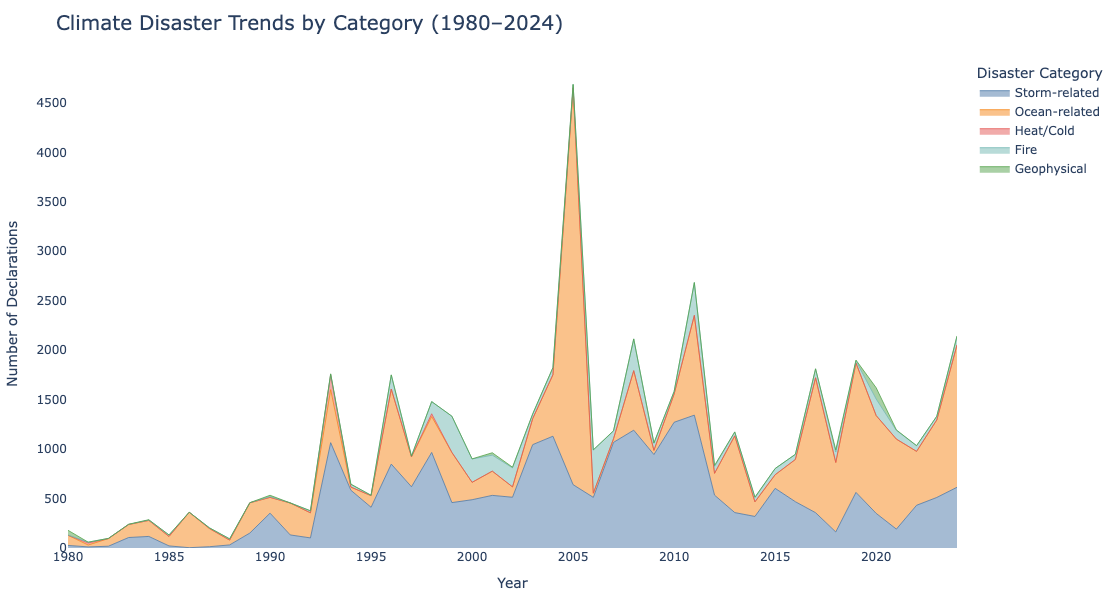

In [285]:
# Group by year and climate category
trend_df = filtered_df.groupby(['fyDeclared', 'Incident Group']).size().reset_index(name='Declarations')

# Filter to 1980–2024 only (for focus)
trend_df = trend_df[(trend_df['fyDeclared'] >= 1980) & (trend_df['fyDeclared'] <= 2024)]

# Sort categories for consistent color mapping
category_order = ['Storm-related', 'Ocean-related', 'Heat/Cold', 'Fire', 'Geophysical']

# Plot stacked area chart
fig = px.area(
    trend_df,
    x='fyDeclared',
    y='Declarations',
    color='Incident Group',
    category_orders={'Incident Group': category_order},
    color_discrete_map={
        'Storm-related': '#4C78A8',
        'Ocean-related': '#F58518',
        'Heat/Cold': '#E45756',
        'Fire': '#72B7B2',
        'Geophysical': '#54A24B'
    },
    title='Climate Disaster Trends by Category (1980–2024)',
    labels={'fyDeclared': 'Year', 'Declarations': 'Disaster Declarations'},
    line_group='Incident Group'  # this adds visual definition between layers
)

fig.update_traces(mode='lines', line=dict(width=0.8), stackgroup='one')

# Style layout
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Number of Declarations',
    legend_title='Disaster Category',
    legend=dict(font=dict(size=12)),
    margin=dict(l=50, r=20, t=60, b=50),
    hovermode='x unified',
    height=600,
    width=1000,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_Trends_AreaChart.png",
    scale=4
)

fig.show()

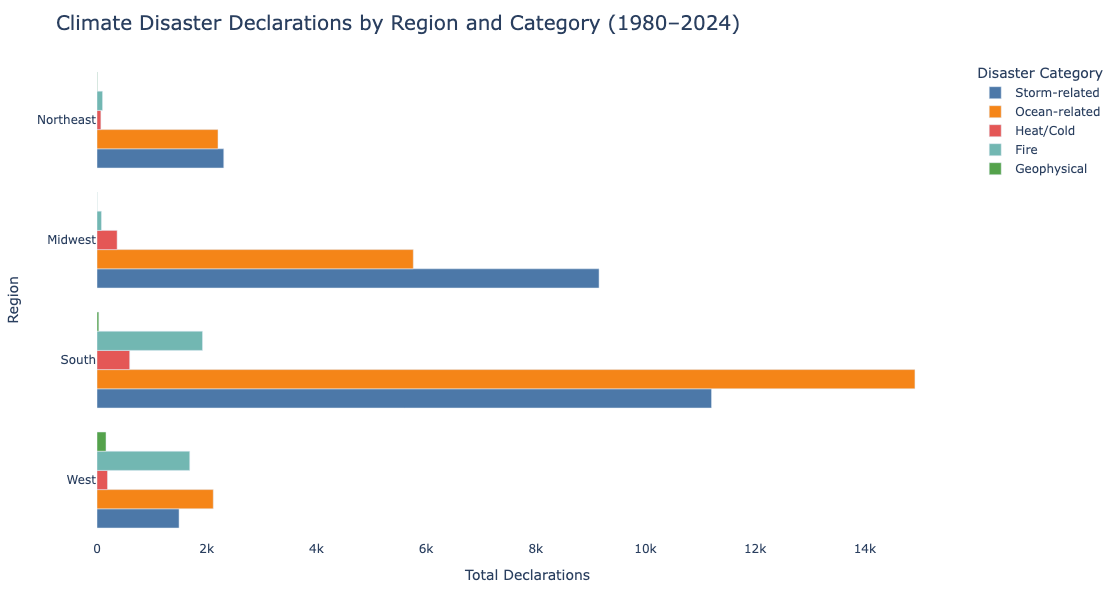

In [289]:
# Group by region and category
region_breakdown = filtered_df.groupby(['region', 'Incident Group']).size().reset_index(name='Declarations')

# Define order and consistent colors
category_order = ['Storm-related', 'Ocean-related', 'Heat/Cold', 'Fire', 'Geophysical']
color_map = {
    'Storm-related': '#4C78A8',
    'Ocean-related': '#F58518',
    'Heat/Cold': '#E45756',
    'Fire': '#72B7B2',
    'Geophysical': '#54A24B'
}

# Plot grouped bar chart (absolute values)
fig = px.bar(
    region_breakdown,
    x='Declarations',
    y='region',
    color='Incident Group',
    barmode='group',
    orientation='h',
    color_discrete_map=color_map,
    category_orders={
        'Incident Group': category_order,
        'region': ['Northeast', 'Midwest', 'South', 'West']
    },
    title='Climate Disaster Declarations by Region and Category (1980–2024)',
    labels={'region': 'Region', 'Declarations': 'Number of Declarations'}
)

# Layout polish
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Total Declarations',
    yaxis_title='Region',
    legend_title='Disaster Category',
    legend=dict(font=dict(size=12)),
    height=600,
    width=950,
    margin=dict(t=60, b=60, l=60, r=40),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Save export
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_RegionalGroupedBar.png",
    scale=4
)

fig.show()

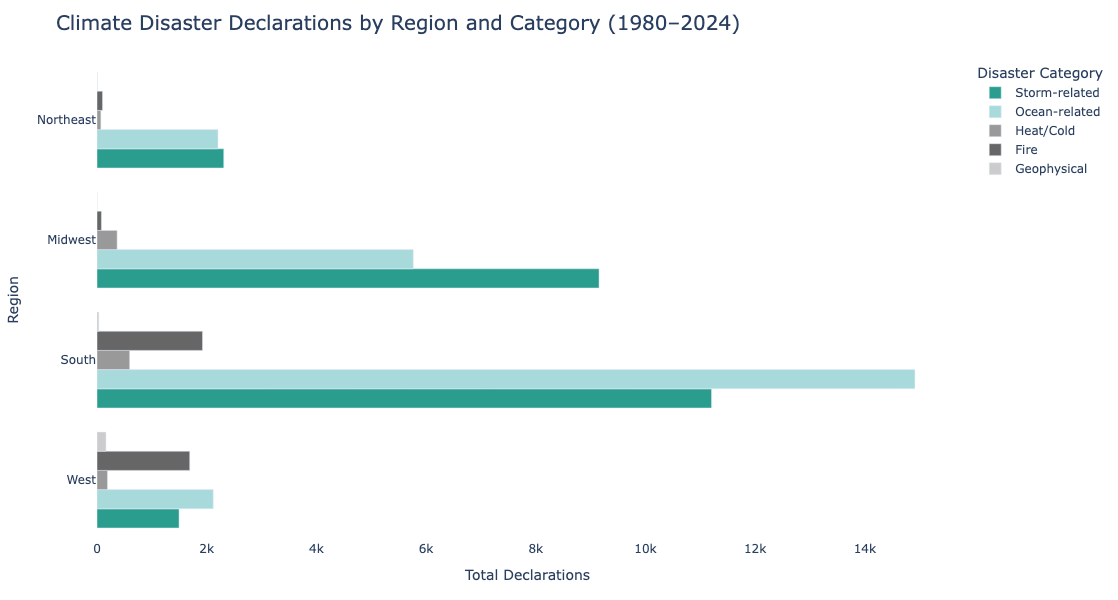

In [291]:
# Group FEMA data by region and disaster category
region_breakdown = filtered_df.groupby(['region', 'Incident Group']).size().reset_index(name='Declarations')

# Define custom category order and color mapping
category_order = ['Storm-related', 'Ocean-related', 'Heat/Cold', 'Fire', 'Geophysical']
custom_colors = {
    'Storm-related': '#2a9d8f',    # deep teal
    'Ocean-related': '#a8dadc',    # soft teal
    'Heat/Cold': '#999999',        # mid-gray
    'Fire': '#666666',             # charcoal
    'Geophysical': '#cccccc'       # light gray
}

# Create grouped bar chart (horizontal)
fig = px.bar(
    region_breakdown,
    x='Declarations',
    y='region',
    color='Incident Group',
    barmode='group',
    orientation='h',
    color_discrete_map=custom_colors,
    category_orders={
        'Incident Group': category_order,
        'region': ['Northeast', 'Midwest', 'South', 'West']
    },
    title='Climate Disaster Declarations by Region and Category (1980–2024)',
    labels={'region': 'Region', 'Declarations': 'Number of Declarations'}
)

# Update layout for clean, exportable styling
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Total Declarations',
    yaxis_title='Region',
    legend_title='Disaster Category',
    legend=dict(font=dict(size=12)),
    height=600,
    width=950,
    margin=dict(t=60, b=60, l=60, r=40),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Export final image
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_RegionalGroupedBar_Styled.png",
    scale=4
)

fig.show()

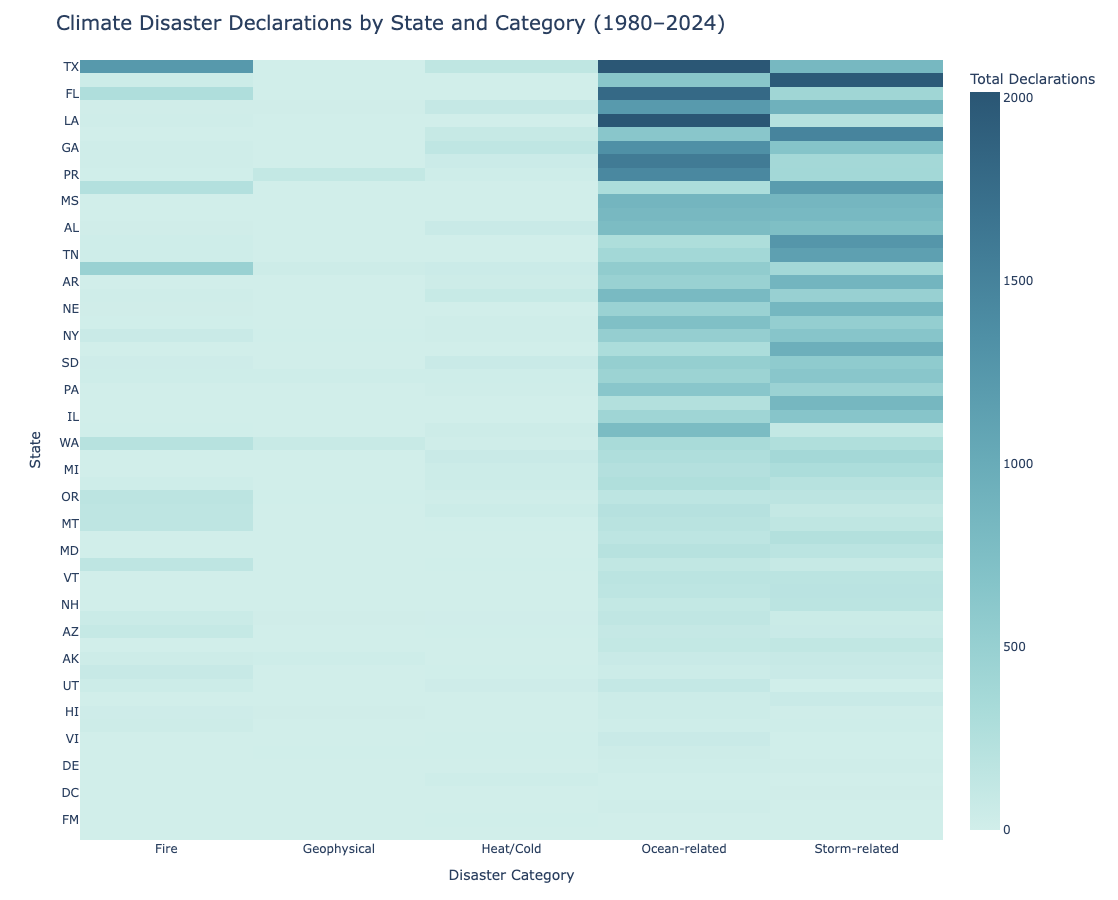

In [295]:
# Aggregate FEMA declarations by state and category
heatmap_df = filtered_df.groupby(['state', 'Incident Group']).size().reset_index(name='Declarations')

# Pivot to matrix format
heatmap_pivot = heatmap_df.pivot(index='state', columns='Incident Group', values='Declarations').fillna(0)

# Sort states by total declarations
state_order = heatmap_pivot.sum(axis=1).sort_values(ascending=False).index.tolist()

# Plot heatmap using valid colorscale
fig = px.imshow(
    heatmap_pivot.loc[state_order],
    labels=dict(x="Disaster Category", y="State", color="Declarations"),
    color_continuous_scale='Teal',  # Valid Plotly scale (or use 'Greys', 'Blues', etc.)
    aspect="auto",
    title="Climate Disaster Declarations by State and Category (1980–2024)"
)

# Layout polish
fig.update_layout(
    title_font=dict(size=20),
    height=900,
    width=1000,
    margin=dict(t=60, b=60, l=80, r=60),
    xaxis_title="Disaster Category",
    yaxis_title="State",
    coloraxis_colorbar=dict(title="Total Declarations"),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Export to your climate folder
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_Heatmap_State_Category.png",
    scale=4
)

# Show in notebook
fig.show()

In [297]:
# Re-aggregate the data
model_df = filtered_df.groupby(['state', 'Incident Group']).size().reset_index(name='Declarations')

# Pivot into wide format (State as rows, categories as columns)
model_matrix = model_df.pivot(index='state', columns='Incident Group', values='Declarations').fillna(0)

# Optional: sort by total disaster volume
model_matrix['Total'] = model_matrix.sum(axis=1)
model_matrix = model_matrix.sort_values(by='Total', ascending=False)

# Preview
model_matrix.head()

Incident Group    Fire  Geophysical  Heat/Cold  Ocean-related  Storm-related  \
state                                                                          
TX              1238.0          0.0      149.0         2002.0          833.0   
KY                41.0          0.0        0.0          648.0         1969.0   
FL               277.0          0.0        0.0         1797.0          414.0   
VA                11.0         10.0      100.0         1219.0          932.0   
LA                16.0          0.0        0.0         2017.0          229.0   

Incident Group   Total  
state                   
TX              4222.0  
KY              2658.0  
FL              2488.0  
VA              2272.0  
LA              2262.0

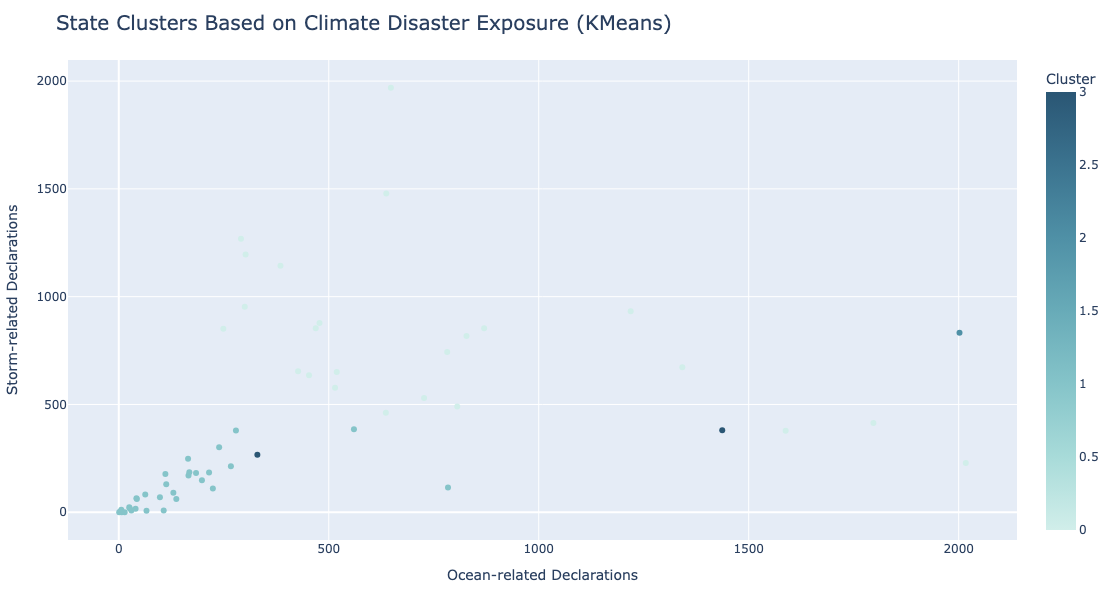

In [299]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features (drop 'Total', keep only category columns)
features = model_matrix.drop(columns='Total')

# Standardize for KMeans
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
model_matrix['Cluster'] = clusters

# Reset index for plotting
model_matrix_reset = model_matrix.reset_index()

# Plot clusters using Ocean vs Storm for visual contrast
fig = px.scatter(
    model_matrix_reset,
    x='Ocean-related',
    y='Storm-related',
    color='Cluster',
    hover_name='state',
    color_continuous_scale='Teal',
    title='State Clusters Based on Climate Disaster Exposure (KMeans)'
)

fig.update_layout(
    title_font=dict(size=20),
    xaxis_title='Ocean-related Declarations',
    yaxis_title='Storm-related Declarations',
    legend_title='Cluster',
    height=600,
    width=800,
    margin=dict(t=60, b=60, l=60, r=40)
)

fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_KMeans_Clusters.png",
    scale=4
)

fig.show()

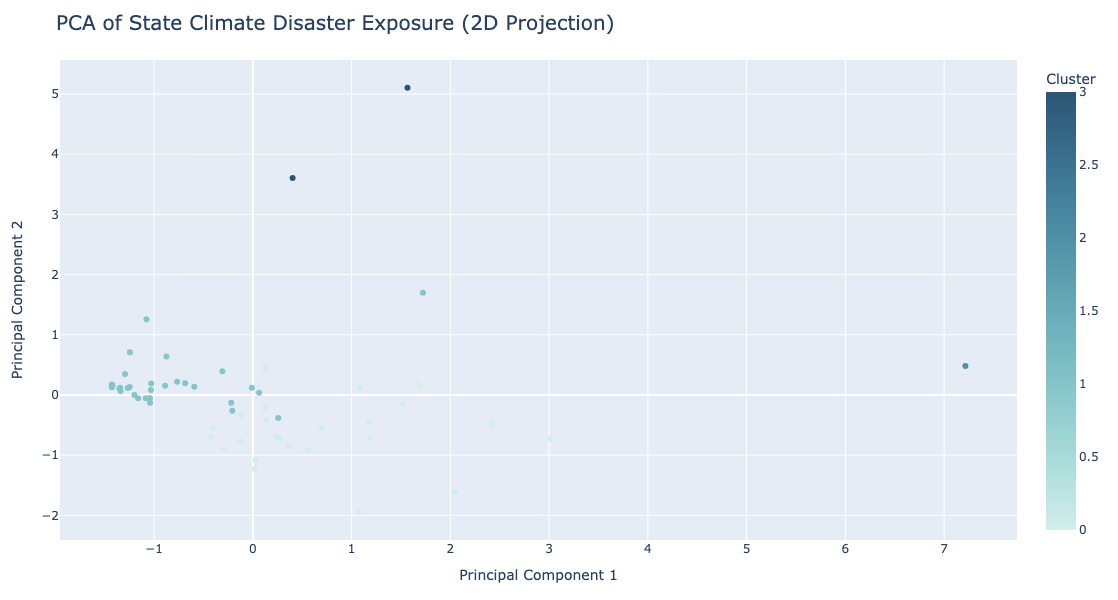

In [301]:
from sklearn.decomposition import PCA

# Use the same scaled features from earlier
# (assuming you ran this before):
# scaled_features = scaler.fit_transform(features)

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create DataFrame for visualization
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['state'] = model_matrix.index
pca_df['Cluster'] = model_matrix['Cluster'].values

# Plot
fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Cluster',
    hover_name='state',
    color_continuous_scale='Teal',
    title='PCA of State Climate Disaster Exposure (2D Projection)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

fig.update_layout(
    title_font=dict(size=20),
    height=600,
    width=800,
    margin=dict(t=60, b=60, l=60, r=40),
    legend_title='Cluster'
)

# Export
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_PCA_Clusters.png",
    scale=4
)

fig.show()

## PCA Projection: State Disaster Exposure by Cluster

This chart reduces each state’s multi-dimensional disaster exposure into two principal components. The color-coded clusters represent distinct regional disaster profiles, such as high ocean-related risk or frequent fire events. Clusters with high PC1 or PC2 scores indicate states with outlier disaster burdens across categories.

In [305]:
# Merge cluster labels with disaster category features
cluster_profiles = model_matrix.reset_index().drop(columns='Total')

# Group by cluster, keeping only numeric category columns
profile_summary = (
    cluster_profiles
    .groupby('Cluster')[['Storm-related', 'Ocean-related', 'Heat/Cold', 'Fire', 'Geophysical']]
    .mean()
    .round(1)
)

# Optional: Reorder columns for visual logic
column_order = ['Storm-related', 'Ocean-related', 'Heat/Cold', 'Fire', 'Geophysical']
profile_summary = profile_summary[column_order]

# Preview
profile_summary

Incident Group  Storm-related  Ocean-related  Heat/Cold    Fire  Geophysical
Cluster                                                                     
0                       817.9          761.9       29.0    34.2          1.7
1                       111.4          145.5       13.1    49.3          3.1
2                       833.0         2002.0      149.0  1238.0          0.0
3                       323.5          883.5       20.5   108.0         93.5

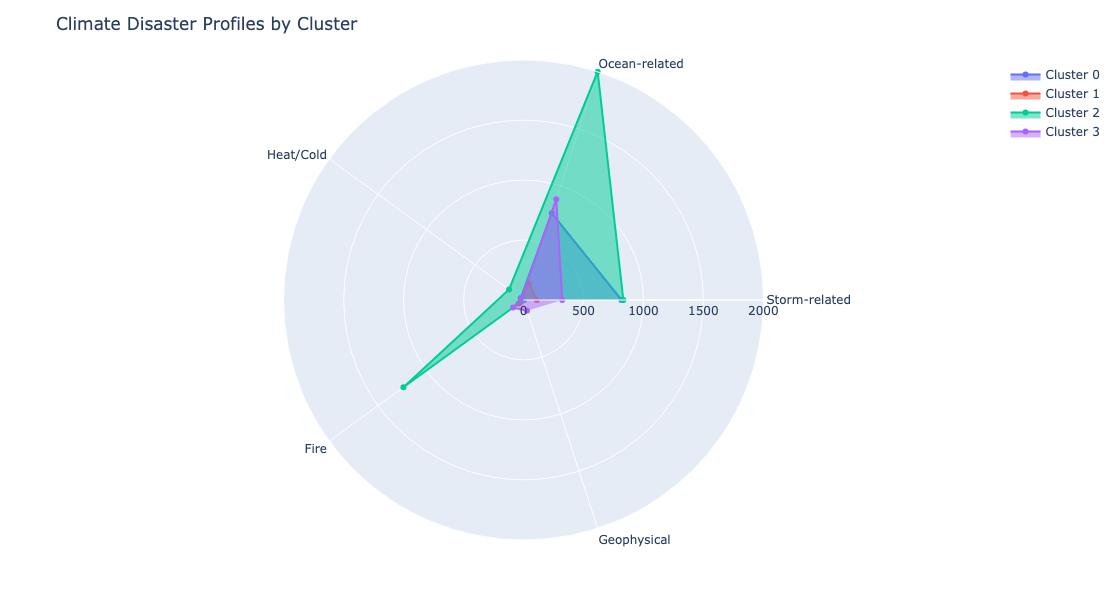

In [307]:
# Create radar chart
fig = go.Figure()

for i in profile_summary.index:
    fig.add_trace(go.Scatterpolar(
        r=profile_summary.loc[i].values,
        theta=profile_summary.columns,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, profile_summary.values.max()])
    ),
    title="Climate Disaster Profiles by Cluster",
    height=600,
    width=800,
    margin=dict(t=60, b=60, l=60, r=60)
)

# Export high-res version
fig.write_image(
    "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/Climate_ClusterProfiles_Radar.png",
    scale=4
)

fig.show()

## Cluster Profiles: Average Disaster Burden by Category

This radar chart displays the average exposure of each cluster to key disaster types. Cluster 2, for example, experiences significantly higher ocean and fire events than the others. This plot supports the notion that some clusters represent more compound and climate-intensive risk environments.

In [309]:
# Load and aggregate CDC SVI to State Level

# Load SVI data
svi_path = "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/SocioEconomic/SVI_2022_US_county.csv"
svi = pd.read_csv(svi_path)

# Aggregate to state level
svi_state = svi.groupby('ST_ABBR')['RPL_THEMES'].mean().reset_index()
svi_state.columns = ['state', 'SVI_2022']

In [348]:
# Load and Clean Uninsured Data Set

# Define file path
uninsured_path = "/Users/justinpizzoferrato/Desktop/DCS680/Climate Project/SocioEconomic/HealthInsuranceCoverageTotalPopulation.csv"

# Load file, skipping first 2 rows
uninsured_df = pd.read_csv(uninsured_path, skiprows=2)

# Map full state names to 2-letter postal codes
state_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Keep just state name and uninsured count
uninsured_df = uninsured_df[['Location', 'Uninsured']]
uninsured_df.columns = ['state_name', 'uninsured_count']

# Remove 'United States' aggregate row
uninsured_df = uninsured_df[uninsured_df['state_name'] != 'United States']

# Map state names to 2-letter postal codes
uninsured_df['state'] = uninsured_df['state_name'].map(state_map)
uninsured_df = uninsured_df.dropna(subset=['state'])

# Preview final cleaned data
display(uninsured_df.head())

state_name  uninsured_count state
1     Alabama         416700.0    AL
2      Alaska          73300.0    AK
3     Arizona         713800.0    AZ
4    Arkansas         272900.0    AR
5  California        2435100.0    CA

In [350]:
# Use model_matrix for raw exposure totals:
base_df = model_matrix.reset_index()

In [358]:
# Preview
print("Model Matrix Columns:", base_df.columns.tolist())
display(base_df.head())

# Merge in Uninsured Count
# uninsured_df must have: ['state', 'uninsured_count']
base_df = base_df.merge(
    uninsured_df[['state', 'uninsured_count']],
    on='state',
    how='left'
)

# Merge in CDC Social Vulnerability Index (SVI)
# svi_state must have: ['state', 'SVI_2022']
base_df = base_df.merge(
    svi_state,
    on='state',
    how='left'
)

# Final Cleanup
# Drop any states missing either metric (just in case)
base_df = base_df.dropna(subset=['uninsured_count', 'SVI_2022'])

print("Final Combined Dataset Columns:", base_df.columns.tolist())
display(base_df.head())
base_df.info()


Model Matrix Columns: ['state', 'Fire', 'Geophysical', 'Heat/Cold', 'Ocean-related', 'Storm-related', 'Total', 'Cluster']


Incident Group state    Fire  Geophysical  Heat/Cold  Ocean-related  \
0                 TX  1238.0          0.0      149.0         2002.0   
1                 KY    41.0          0.0        0.0          648.0   
2                 FL   277.0          0.0        0.0         1797.0   
3                 VA    11.0         10.0      100.0         1219.0   
4                 LA    16.0          0.0        0.0         2017.0   

Incident Group  Storm-related   Total  Cluster  
0                       833.0  4222.0        2  
1                      1969.0  2658.0        0  
2                       414.0  2488.0        0  
3                       932.0  2272.0        0  
4                       229.0  2262.0        0

Final Combined Dataset Columns: ['state', 'Fire', 'Geophysical', 'Heat/Cold', 'Ocean-related', 'Storm-related', 'Total', 'Cluster', 'uninsured_count', 'SVI_2022']


state    Fire  Geophysical  Heat/Cold  Ocean-related  Storm-related   Total  \
0    TX  1238.0          0.0      149.0         2002.0          833.0  4222.0   
1    KY    41.0          0.0        0.0          648.0         1969.0  2658.0   
2    FL   277.0          0.0        0.0         1797.0          414.0  2488.0   
3    VA    11.0         10.0      100.0         1219.0          932.0  2272.0   
4    LA    16.0          0.0        0.0         2017.0          229.0  2262.0   

   Cluster  uninsured_count  SVI_2022  
0        2        4869500.0  0.706484  
1        0         247600.0  0.528385  
2        0        2357500.0  0.708306  
3        0         536900.0  0.435501  
4        0         308500.0  0.772586

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 54
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            51 non-null     object 
 1   Fire             51 non-null     float64
 2   Geophysical      51 non-null     float64
 3   Heat/Cold        51 non-null     float64
 4   Ocean-related    51 non-null     float64
 5   Storm-related    51 non-null     float64
 6   Total            51 non-null     float64
 7   Cluster          51 non-null     int32  
 8   uninsured_count  51 non-null     float64
 9   SVI_2022         51 non-null     float64
dtypes: float64(8), int32(1), object(1)
memory usage: 4.2+ KB


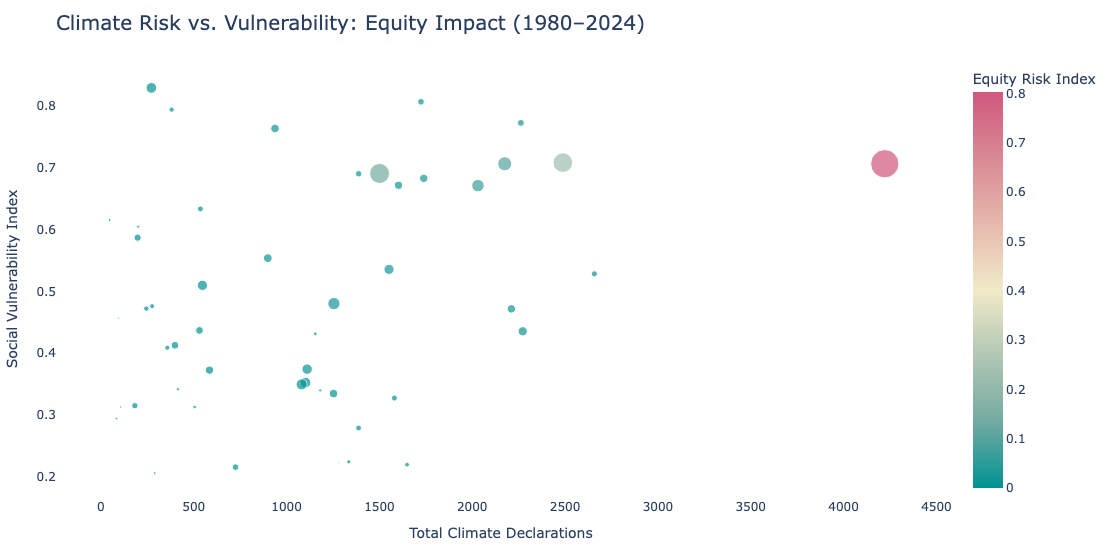

In [386]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# Select relevant columns to scale
columns_to_scale = ['Total', 'SVI_2022', 'uninsured_count']
scaler = MinMaxScaler()

# Drop rows with any nulls in columns of interest
base_df_filtered = base_df.dropna(subset=columns_to_scale).copy()

# Fit and transform
scaled_values = scaler.fit_transform(base_df_filtered[columns_to_scale])

# Convert scaled values to DataFrame
scaled_df = pd.DataFrame(
    scaled_values,
    columns=[f"{col}_scaled" for col in columns_to_scale],
    index=base_df_filtered.index
)

# Attach scaled columns to filtered base
base_df_filtered = pd.concat([base_df_filtered, scaled_df], axis=1)

# Calculate Equity Risk Index (risk = exposure × vulnerability)
base_df_filtered['equity_risk_index'] = (
    base_df_filtered['Total_scaled'] *
    base_df_filtered['SVI_2022_scaled'] *
    base_df_filtered['uninsured_count_scaled']
)

# Adjust size for visibility
base_df_filtered['uninsured_scaled_size'] = (
    base_df_filtered['uninsured_count_scaled'] * 50
)

# Plot Bubble Chart
fig = px.scatter(
    base_df_filtered,
    x='Total',
    y='SVI_2022',
    size='uninsured_scaled_size',
    color='equity_risk_index',
    hover_name='state',
    color_continuous_scale='Tealrose',
    title="Climate Risk vs. Vulnerability: Equity Impact (1980–2024)",
    labels={
        'Total': 'Total Climate Declarations',
        'SVI_2022': 'Social Vulnerability Index',
        'uninsured_scaled_size': 'Scaled Uninsured Count',
        'equity_risk_index': 'Equity Risk Index'
    }
)

fig.update_layout(
    title_font=dict(size=20),
    height=550,
    width=950,
    margin=dict(l=40, r=40, t=60, b=40),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

In [388]:
print(base_df.columns.tolist())

['index', 'state', 'Fire', 'Geophysical', 'Heat/Cold', 'Ocean-related', 'Storm-related', 'Total', 'Cluster', 'uninsured_count', 'SVI_2022', 'Total_scaled_x', 'SVI_2022_scaled_x', 'uninsured_count_scaled_x', 'equity_risk_index', 'uninsured_scaled_size', 'Total_scaled_x', 'SVI_2022_scaled_x', 'uninsured_count_scaled_x', 'Total_scaled_x', 'SVI_2022_scaled_x', 'uninsured_count_scaled_x', 'Total_scaled_x', 'SVI_2022_scaled_x', 'uninsured_count_scaled_x', 'Total_scaled_y', 'SVI_2022_scaled_y', 'uninsured_count_scaled_y']


In [390]:
# Normalize size to avoid rendering issues
base_df['uninsured_scaled_size'] = base_df['uninsured_count'] / base_df['uninsured_count'].max()
base_df['uninsured_scaled_size'] *= 50  # scale for visibility

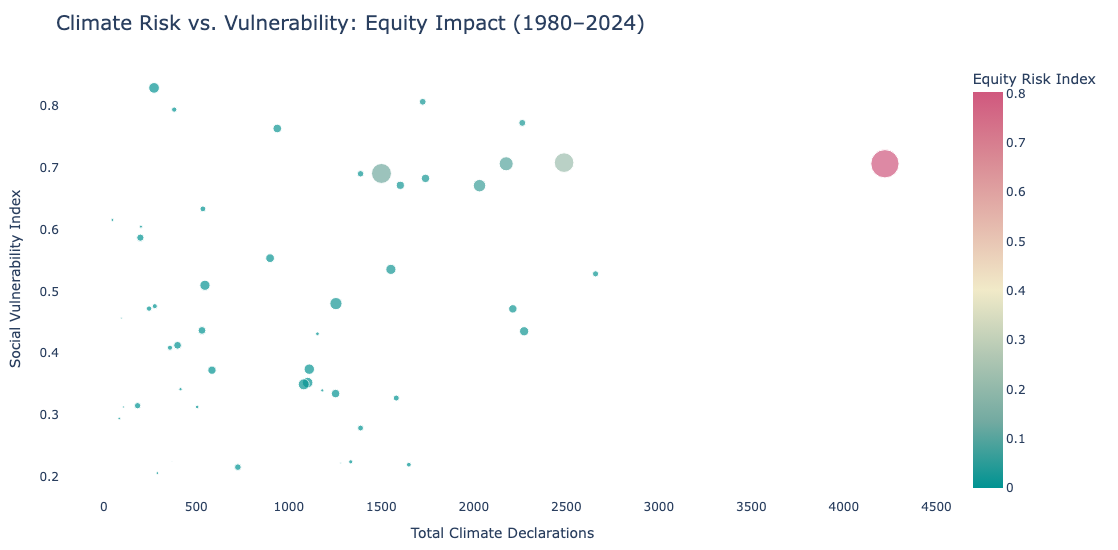

In [396]:
# Ensure plotting columns are numeric and no NaNs
plot_df = base_df.copy()

# Remove any rows with NaNs in critical columns
plot_df = plot_df[['Total', 'SVI_2022', 'uninsured_scaled_size', 'equity_risk_index', 'state']].dropna()

# Convert everything explicitly to numeric (if needed)
plot_df['Total'] = pd.to_numeric(plot_df['Total'], errors='coerce')
plot_df['SVI_2022'] = pd.to_numeric(plot_df['SVI_2022'], errors='coerce')
plot_df['uninsured_scaled_size'] = pd.to_numeric(plot_df['uninsured_scaled_size'], errors='coerce')
plot_df['equity_risk_index'] = pd.to_numeric(plot_df['equity_risk_index'], errors='coerce')

# Now re-drop any rows with NaNs
plot_df = plot_df.dropna()

# Create final bubble plot
fig = px.scatter(
    plot_df,
    x='Total',
    y='SVI_2022',
    size='uninsured_scaled_size',
    color='equity_risk_index',
    hover_name='state',
    color_continuous_scale='Tealrose',
    title='Climate Risk vs. Vulnerability: Equity Impact (1980–2024)',
    labels={
        'Total': 'Total Climate Declarations',
        'SVI_2022': 'Social Vulnerability Index',
        'uninsured_scaled_size': 'Scaled Uninsured Count',
        'equity_risk_index': 'Equity Risk Index'
    }
)

fig.update_layout(
    title_font=dict(size=20),
    height=550,
    width=950,
    margin=dict(l=60, r=40, t=60, b=40),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

## Equity Impact by Risk and Vulnerability

This bubble chart highlights the relationship between total climate declarations, social vulnerability, and uninsured burden. Larger bubbles indicate states with a high uninsured population, while darker colors represent higher combined risk. Texas, Florida, and Louisiana again emerge as top priorities based on exposure and fragility.

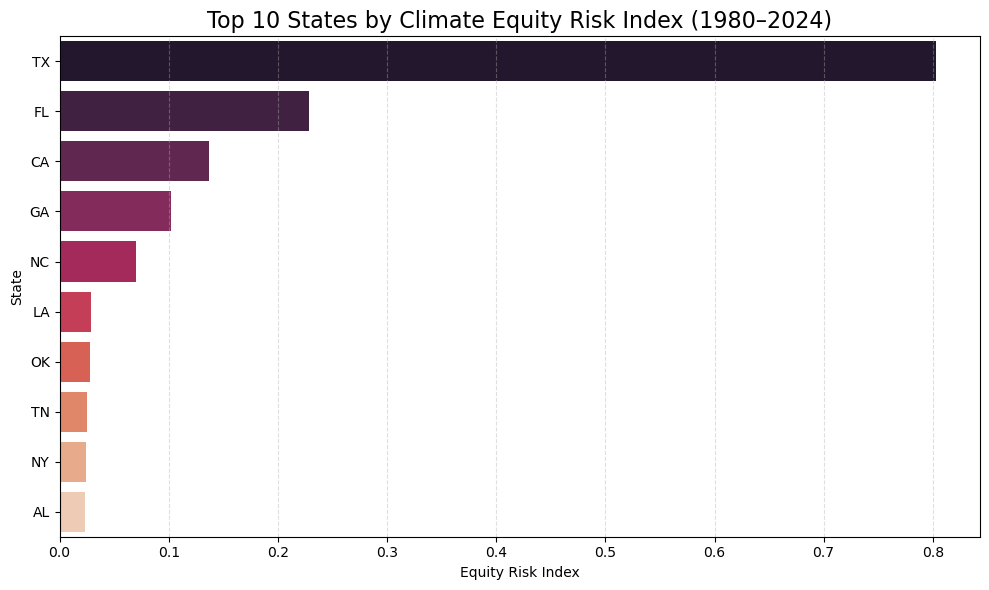

In [398]:
import seaborn as sns

# Sort by equity risk index and select top 10 states
top10_risk = base_df.sort_values("equity_risk_index", ascending=False).head(10)

# Plot using seaborn bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_risk,
    x="equity_risk_index",
    y="state",
    palette="rocket"
)

# Customize visual
plt.title("Top 10 States by Climate Equity Risk Index (1980–2024)", fontsize=16)
plt.xlabel("Equity Risk Index")
plt.ylabel("State")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.show()

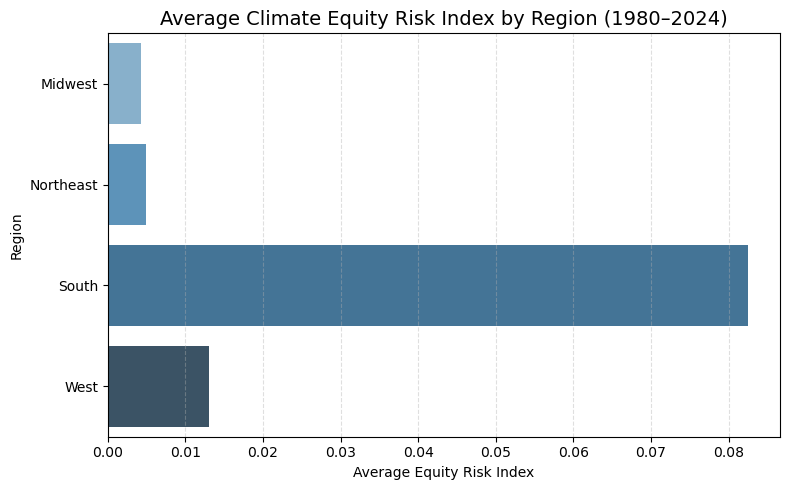

In [400]:
# Define state-to-region mapping
region_map = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA'],
    'Midwest': ['IN', 'IL', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV',
              'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX'],
    'West': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY',
             'AK', 'CA', 'HI', 'OR', 'WA']
}

# Reverse map: state → region
state_to_region = {state: region for region, states in region_map.items() for state in states}

# Assign region to base_df
base_df['region'] = base_df['state'].map(state_to_region)

# Compute average risk index per region
region_avg = base_df.groupby('region')['equity_risk_index'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=region_avg, x='equity_risk_index', y='region', palette='Blues_d')

plt.title("Average Climate Equity Risk Index by Region (1980–2024)", fontsize=14)
plt.xlabel("Average Equity Risk Index")
plt.ylabel("Region")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

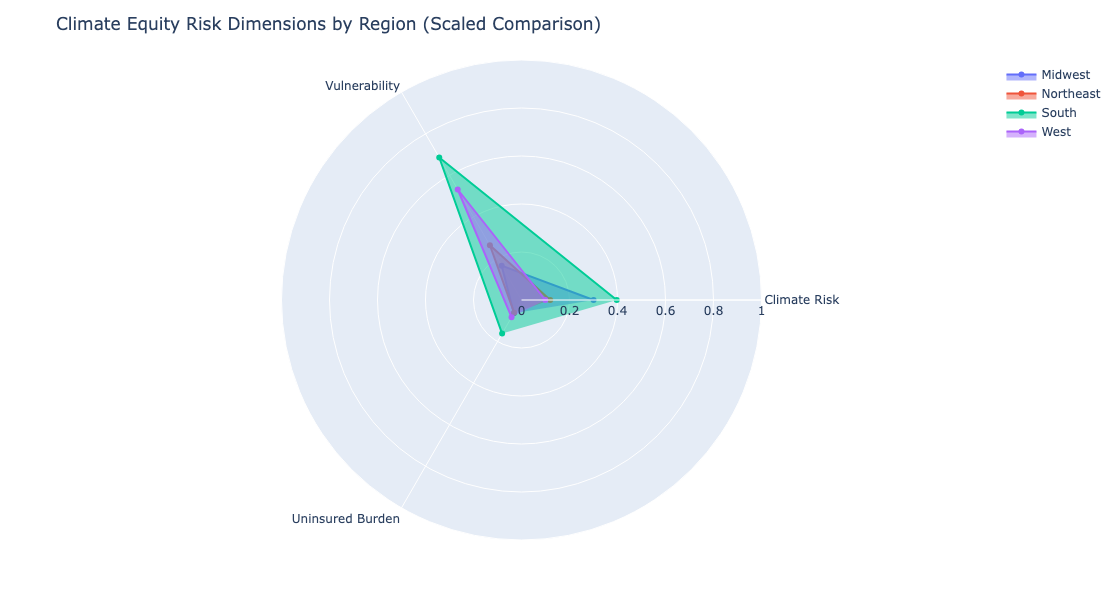

In [402]:
# Group and average scaled values by region
radar_data = base_df.groupby('region')[['Total_scaled', 'SVI_2022_scaled', 'uninsured_count_scaled']].mean().reset_index()

# Rename for cleaner radar labels
radar_data = radar_data.rename(columns={
    'Total_scaled': 'Climate Risk',
    'SVI_2022_scaled': 'Vulnerability',
    'uninsured_count_scaled': 'Uninsured Burden'
})

# Plot as radar chart
import plotly.graph_objects as go

fig = go.Figure()

for i, row in radar_data.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1:].values,
        theta=row[1:].index,
        fill='toself',
        name=row['region']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Climate Equity Risk Dimensions by Region (Scaled Comparison)",
    height=600,
    width=800,
    margin=dict(l=60, r=60, t=60, b=60),
    showlegend=True
)

fig.show()

## Regional Equity Risk Dimensions

This radar chart compares climate disaster exposure (risk), population-level vulnerability (SVI), and uninsured burden across U.S. regions. The South shows the highest combined equity burden, reinforcing the prioritization logic behind states like TX, FL, and LA in the risk index.

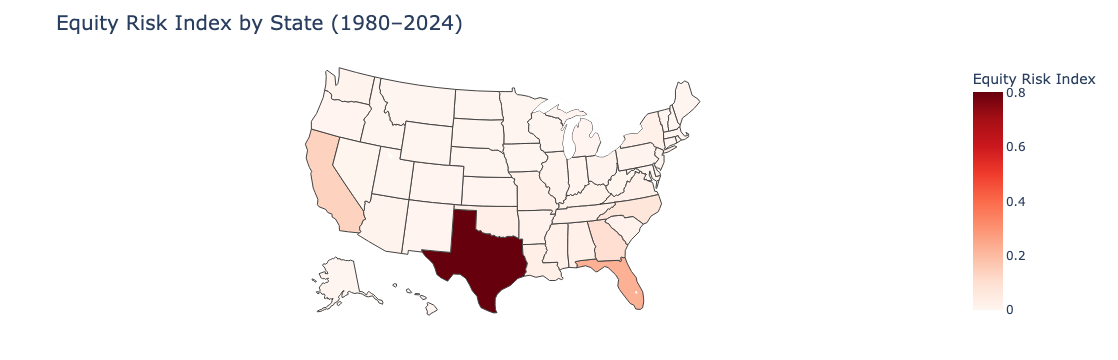

In [404]:
# Choropleth map of Equity Risk Index
fig = px.choropleth(
    base_df,
    locations='state',
    locationmode='USA-states',
    color='equity_risk_index',
    scope='usa',
    color_continuous_scale='Reds',
    title='Equity Risk Index by State (1980–2024)',
    labels={'equity_risk_index': 'Equity Risk Index'}
)

fig.update_layout(
    geo=dict(bgcolor='white'),
    title_font_size=20,
    margin=dict(l=60, r=40, t=60, b=40)
)
fig.show()

## Geographic Distribution of Climate Equity Risk

The choropleth shows a concentration of high equity risk in Southern states, including Texas, Florida, and Louisiana. These states face frequent severe disasters and have high social vulnerability and uninsured rates. Northern and Western states tend to score lower.

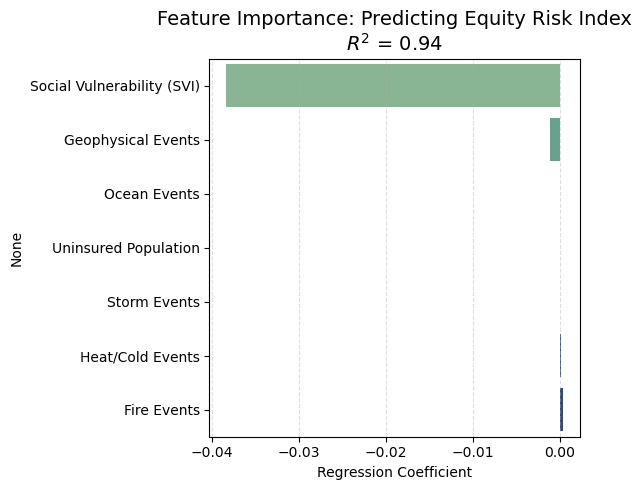

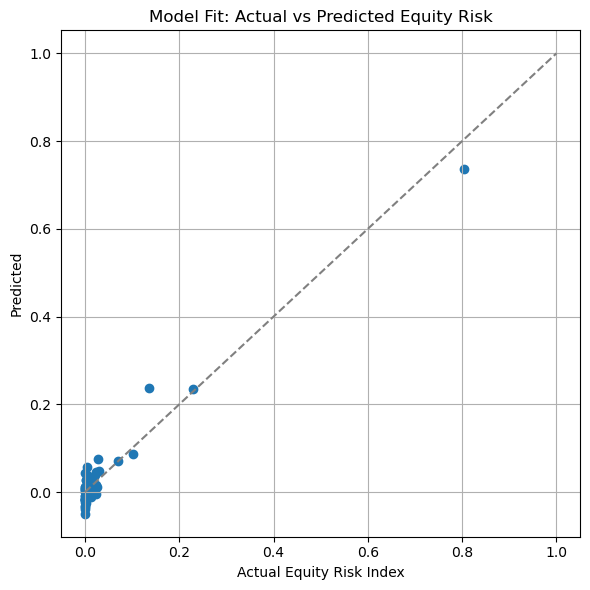

In [422]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target
features = ['Storm-related', 'Ocean-related', 'Fire', 'Heat/Cold', 'Geophysical', 'SVI_2022', 'uninsured_count']
X = base_df[features]
y = base_df['equity_risk_index']

# Drop rows with NaNs in X or y
valid_rows = X.notnull().all(axis=1) & y.notnull()
X_clean = X[valid_rows]
y_clean = y[valid_rows]
base_clean = base_df[valid_rows].copy()

# Fit model
model = LinearRegression()
model.fit(X_clean, y_clean)

# Predict and evaluate
y_pred = model.predict(X_clean)
base_clean['predicted_equity_index'] = y_pred
r2 = r2_score(y_clean, y_pred)

# Feature importances
coefs = pd.Series(model.coef_, index=[
    'Ocean Events', 'Storm Events', 'Fire Events',
    'Heat/Cold Events', 'Geophysical Events',
    'Social Vulnerability (SVI)', 'Uninsured Population'
]).sort_values()

# Bar chart of coefficients
plt.figure(figsize=(6, 5))
sns.barplot(x=coefs.values, y=coefs.index, palette='crest')
plt.title(f"Feature Importance: Predicting Equity Risk Index\n$R^2$ = {r2:.2f}", fontsize=14)
plt.xlabel("Regression Coefficient")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Scatterplot of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_clean, y_pred)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Actual Equity Risk Index")
plt.ylabel("Predicted")
plt.title("Model Fit: Actual vs Predicted Equity Risk")
plt.grid(True)
plt.tight_layout()
plt.show()